# PART E

In [1]:
def tuple_update_distance(X, Y):
    m = len(X)
    n = len(Y)

    # dp matrix
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Initializing the table
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 and j == 0:
                dp[i][j] = 0 # Both prefixes of X and Y are empty
            elif i == 0:
                dp[i][j] = j  # Prefix of X is empty, insert j tuples to X
            elif j == 0:
                dp[i][j] = i  # Prefix of Y is empty, delete i tuples from X
            elif X[i - 1] == Y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # No operation needed
            else: 
                dp[i][j] = 1 + min(dp[i - 1][j],  # Deletion
                                  dp[i][j - 1],  # Insertion
                                  dp[i - 1][j - 1])  # Replace

    # Backtrace to find the operations as we did in the lectures
    i, j = m, n
    operations = []

    while i > 0 or j > 0:
        if i > 0 and j > 0 and X[i - 1] == Y[j - 1]:
            # Moving diagonally
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == dp[i - 1][j] + 1:
            # Deletion
            operations.append(('delete', i))
            i -= 1
        elif j > 0 and dp[i][j] == dp[i][j - 1] + 1:
            # Insertion
            operations.append(('insert', j-1, Y[j - 1]))
            j -= 1
        else:
            # Replace 
            if i > 0 and j > 0:
                operations.append(('replace', i, Y[j - 1]))
            i -= 1
            j -= 1

    operations.reverse()
    
    #update the operation indexes that are changing due to insert and delete
    adjusted_operations = []
    offset = 0 
    for op in operations:
        operation, index, *rest = op
        if operation == 'insert':
            adjusted_operations.append((operation, index + offset, *rest))
            offset += 1  # Increase offset for each insertion
        elif operation == 'delete':
            adjusted_operations.append((operation, index + offset))
            offset -= 1  # Decrease offset for each deletion
        else:  # Replace operation
            adjusted_operations.append((operation, index + offset, *rest))
    return dp[m][n], adjusted_operations

In [2]:
X = [(1, 1), (3, 6), (2, 5), (4, 4)]
Y = [(1, 6), (3, 4), (2, 5)]

distance, ops = tuple_update_distance(X, Y)

print("Update Distance:", distance)
print("Operations:")
for operation in ops:
    print(operation)

Update Distance: 3
Operations:
('replace', 1, (1, 6))
('replace', 2, (3, 4))
('delete', 4)


In [3]:
X = [(2, 3), (5, 8), (7, 10), (12, 15), (16, 20)]
Y = [(2, 4), (6, 9), (7, 10), (11, 14), (16, 19), (21, 25)]


distance, ops = tuple_update_distance(X, Y)

print("Update Distance:", distance)
print("Operations:")
for operation in ops:
    print(operation)

Update Distance: 5
Operations:
('replace', 1, (2, 4))
('replace', 2, (6, 9))
('replace', 4, (11, 14))
('replace', 5, (16, 19))
('insert', 5, (21, 25))


In [4]:
X = [(1, 2), (3, 4)]
Y = [(3, 4), (1, 2)]
distance, ops = tuple_update_distance(X, Y)

print("Update Distance:", distance)
print("Operations:")
for operation in ops:
    print(operation)

Update Distance: 2
Operations:
('insert', 0, (3, 4))
('delete', 3)


# PART F

In [5]:
# Black Box Test Cases
# Testing edge cases
black_box_tests = [
    ([], []),  # Both X and Y are empty
    ([(1, 2)], []),  # X is non-empty and Y is empty
    ([], [(1, 2)]),  # X is empty and Y is non-empty
    ([(1, 2)], [(1, 2)]),  # X and Y are the same
    ([(1, 2), (3, 4)], [(2, 3), (4, 5)]),  # Equal length but different contents
    ([(1, 2)], [(1, 2), (3, 4), (5, 6)]),  # Different lengths
    ([(1, 2), (3, 4)], [(3, 4), (1, 2)]),  # Same items but in different order
]

# White Box Test Cases
white_box_tests = [
    # Statement Coverage
    ([], []),
    ([], [(1, 2)]),
    ([(1, 2)], []),
    ([(1, 2)], [(1, 2)]),
    ([(1, 2)], [(2, 3)]),

    # Decision Coverage
    ([], []),
    ([], [(1, 2)]),
    ([(1, 2)], []),
    ([(1, 2)], [(1, 2)]),
    ([(1, 2)], [(1, 3)]),
    ([(1, 2), (3, 4)], [(1, 2)]),
    ([(1, 2)], [(1, 2), (3, 4)]),

    # Path Coverage
    ([], []),
    ([], [(1, 2)]),
    ([(1, 2)], []),
    ([(1, 2)], [(1, 2)]),
    ([(1, 2)], [(2, 3)]),
    ([(1, 2), (3, 4)], [(1, 2)]),
    ([(1, 2)], [(1, 2), (3, 4)]),
    ([(1, 2), (3, 4)], [(1, 2), (3, 5)]),
    ([(3, 4), (1, 2)], [(3, 5), (1, 2)]),
    ([(1, 2), (3, 4), (5, 6)], [(1, 2), (3, 5), (5, 6)]),
    ([(1, 2), (3, 6), (2, 5), (4, 4)], [(1, 6), (3, 4), (2, 5)]),  

]



In [6]:
def run_tests(tests):
    results = []
    for i, (X, Y) in enumerate(tests, 1):
        distance, ops = tuple_update_distance(X, Y)
        results.append((i, X, Y, distance, ops))
    return results


white_box_results = run_tests(white_box_tests)
black_box_results = run_tests(black_box_tests)

In [7]:
#(1, [], [], 0, []) -> Explanation(Test Case 1 result):
# 1 = test no 
# [] = X(input) and [] = Y(input)
# 0 = update distance
# [] = print operations
print("Black Box Results:")
print("-------------------")
for i in black_box_results:
    print(f"Test Case {i[0]} Results: {i}")

Black Box Results:
-------------------
Test Case 1 Results: (1, [], [], 0, [])
Test Case 2 Results: (2, [(1, 2)], [], 1, [('delete', 1)])
Test Case 3 Results: (3, [], [(1, 2)], 1, [('insert', 0, (1, 2))])
Test Case 4 Results: (4, [(1, 2)], [(1, 2)], 0, [])
Test Case 5 Results: (5, [(1, 2), (3, 4)], [(2, 3), (4, 5)], 2, [('replace', 1, (2, 3)), ('replace', 2, (4, 5))])
Test Case 6 Results: (6, [(1, 2)], [(1, 2), (3, 4), (5, 6)], 2, [('insert', 1, (3, 4)), ('insert', 3, (5, 6))])
Test Case 7 Results: (7, [(1, 2), (3, 4)], [(3, 4), (1, 2)], 2, [('insert', 0, (3, 4)), ('delete', 3)])


In [8]:
print("White Box Results:")
print("-------------------")
for i in white_box_results:
    print(f"Test Case {i[0]} Results: {i}")

White Box Results:
-------------------
Test Case 1 Results: (1, [], [], 0, [])
Test Case 2 Results: (2, [], [(1, 2)], 1, [('insert', 0, (1, 2))])
Test Case 3 Results: (3, [(1, 2)], [], 1, [('delete', 1)])
Test Case 4 Results: (4, [(1, 2)], [(1, 2)], 0, [])
Test Case 5 Results: (5, [(1, 2)], [(2, 3)], 1, [('replace', 1, (2, 3))])
Test Case 6 Results: (6, [], [], 0, [])
Test Case 7 Results: (7, [], [(1, 2)], 1, [('insert', 0, (1, 2))])
Test Case 8 Results: (8, [(1, 2)], [], 1, [('delete', 1)])
Test Case 9 Results: (9, [(1, 2)], [(1, 2)], 0, [])
Test Case 10 Results: (10, [(1, 2)], [(1, 3)], 1, [('replace', 1, (1, 3))])
Test Case 11 Results: (11, [(1, 2), (3, 4)], [(1, 2)], 1, [('delete', 2)])
Test Case 12 Results: (12, [(1, 2)], [(1, 2), (3, 4)], 1, [('insert', 1, (3, 4))])
Test Case 13 Results: (13, [], [], 0, [])
Test Case 14 Results: (14, [], [(1, 2)], 1, [('insert', 0, (1, 2))])
Test Case 15 Results: (15, [(1, 2)], [], 1, [('delete', 1)])
Test Case 16 Results: (16, [(1, 2)], [(1, 2)]

### Exporting Part F Results as TXT

In [9]:
def write_results_to_txt(file_path, results):
    with open(file_path, mode='w') as file:
        for i, result in enumerate(results, 1):
            file.write(f"Test {i}\n")
            file.write(f"X = {result[1]}\n")
            file.write(f"Y = {result[2]}\n")
            file.write(f"updates = {result[4]}\n")
            file.write(f"Distance = {result[3]}\n\n")

black_box_txt_path = 'black_box_results.txt'
white_box_txt_path = 'white_box_results.txt'

write_results_to_txt(black_box_txt_path, black_box_results)
write_results_to_txt(white_box_txt_path, white_box_results)

print(f"Black Box Results written to: {black_box_txt_path}")
print(f"White Box Results written to: {white_box_txt_path}")


Black Box Results written to: black_box_results.txt
White Box Results written to: white_box_results.txt


# PART G

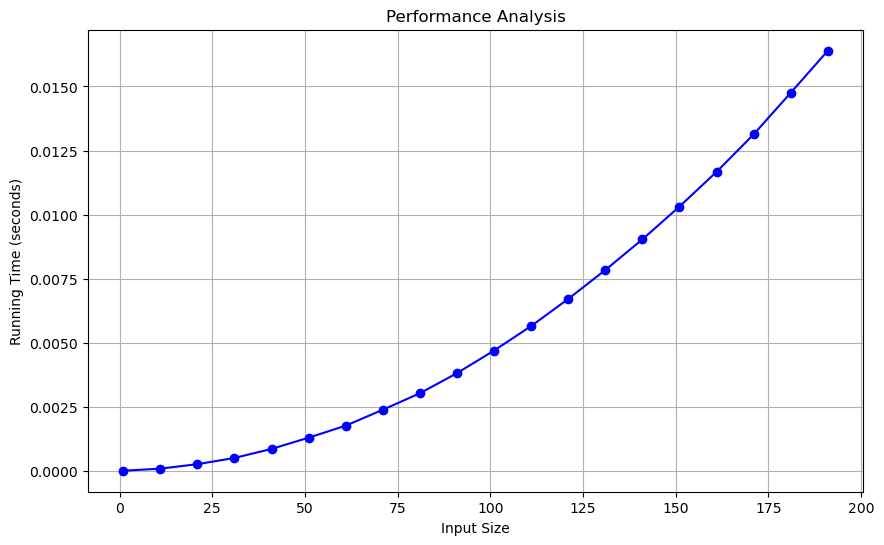

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import time

def generate_random_instance(size):
    return [(np.random.randint(1, 10), np.random.randint(1, 10)) for _ in range(size)]

def performance_testing(sample_size, instance_sizes):
    results = []
    with open('performance_test_results.txt', 'w') as file:
        test_number = 1
        for size in instance_sizes:
            times = []
            for _ in range(sample_size):
                X = generate_random_instance(size)
                Y = generate_random_instance(size)
                start_time = time.time()
                tuple_update_distance(X, Y)
                time_taken = time.time() - start_time
                times.append(time_taken)

                
                file.write(f"Test {test_number} - Instance Size: {size}\n")
                file.write(f"X = {X}\n")
                file.write(f"Y = {Y}\n")
                file.write(f"Time Taken = {time_taken:.4f} seconds\n\n")
                test_number += 1
            
           
            mean_time = np.mean(times)
            std_dev_time = np.std(times)
            results.append((size, mean_time, std_dev_time))
    
    return results

# Parameters testing
sample_size = 1000  # Number of samples for each instance size
instance_sizes = range(1, 201, 10)  # Instance sizes 

performance_results = performance_testing(sample_size, instance_sizes)

sizes, mean_times, std_dev_times = zip(*performance_results)

plt.figure(figsize=(10, 6))
plt.plot(sizes, mean_times, linestyle='-', color='blue', marker='o')
plt.title('Performance Analysis')
plt.xlabel('Input Size')
plt.ylabel('Running Time (seconds)')
plt.grid(True)
plt.show()